In [1]:
import os
import docopt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import my_modules.file_repo_func as file_repo_func
from my_modules.file_repo_func import import_csv_to_df
from my_modules.file_repo_func import repo_check
from my_modules.file_repo_func import import_dskTXTparse_to_df

In [38]:
tableau_csv = 'hifi_run1_pool_h5info.txt'
df = import_dskTXTparse_to_df(tableau_csv)
df.drop_duplicates(inplace=True)
df['kmers_nb_distinct'] = df['kmers_nb_distinct'].astype(float)
df['kmers_nb_solid'] = df['kmers_nb_solid'].astype(float)
df['kmers_nb_weak'] = df['kmers_nb_weak'].astype(float)
df['kmers_percent_weak'] = df['kmers_percent_weak'].astype(float)
df['sampling_size'] = df['sampling_size'].astype(float)

nom_rep_output = 'plot'
nom_rep_output = repo_check(nom_rep_output)

In [39]:
var =df.columns[len(df.columns)-3:]
counts = df.columns[:len(df.columns)-4]
var, counts

(Index(['techno', 'replicat', 'sampling_size'], dtype='object'),
 Index(['kmers_nb_distinct', 'kmers_nb_solid', 'kmers_nb_weak'], dtype='object'))

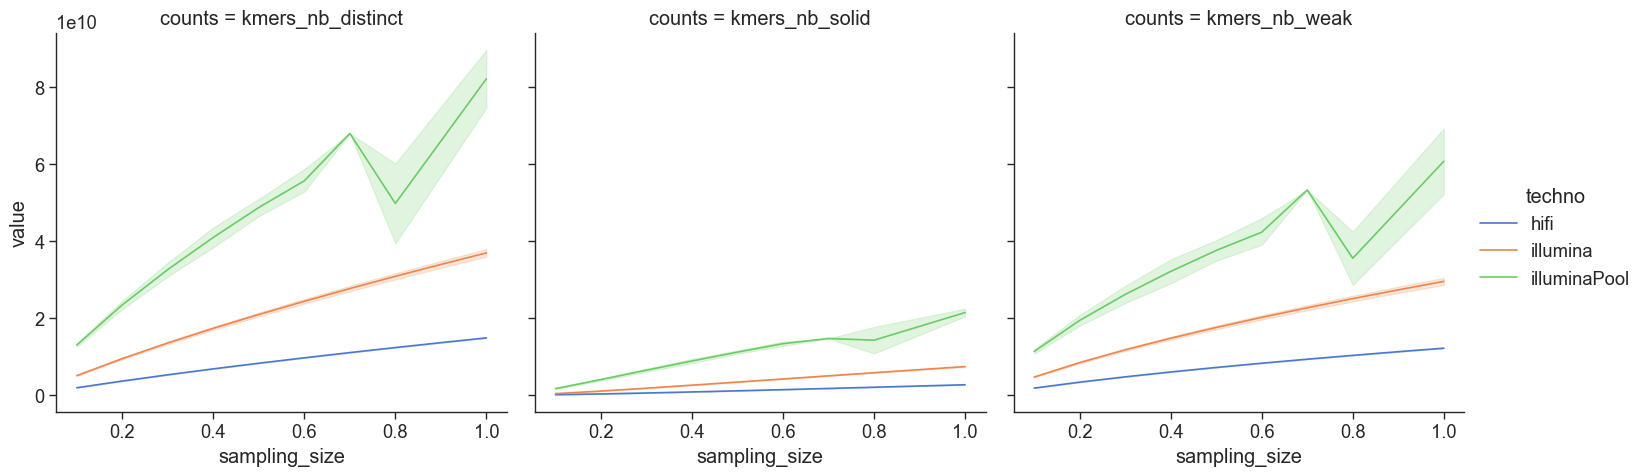

In [40]:
df_melted = pd.melt(df, id_vars=var, value_vars=counts, var_name='counts')
df_melted = df_melted.loc[df_melted.techno != 'bank', :]
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")
sns.set_style("ticks")
g = sns.relplot(x="sampling_size", y="value", hue="techno", col="counts", kind="line", data=df_melted, palette="muted")

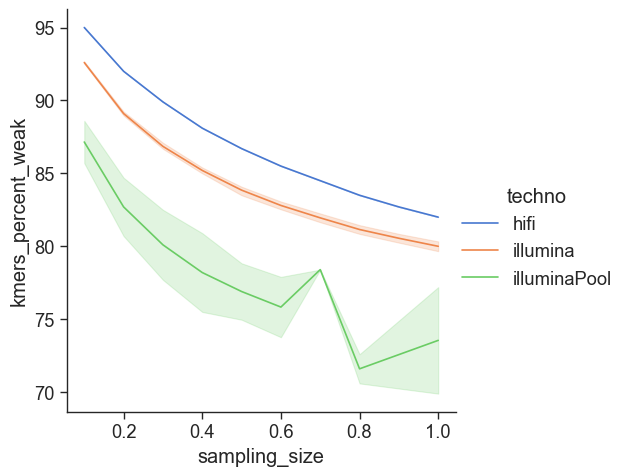

In [42]:
g = sns.relplot(x="sampling_size", y="kmers_percent_weak", hue="techno", kind="line", data=df, palette="muted")

In [46]:
df["sampling_size"] = pd.to_numeric(df["sampling_size"], errors="coerce")
df["kmers_percent_weak"] = pd.to_numeric(df["kmers_percent_weak"], errors="coerce")

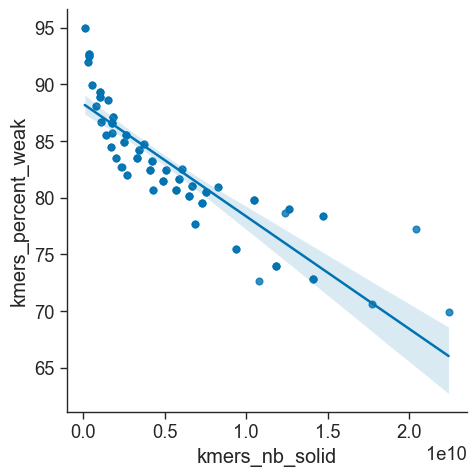

In [43]:
sns.lmplot(x="kmers_nb_solid", y="kmers_percent_weak", data=df);

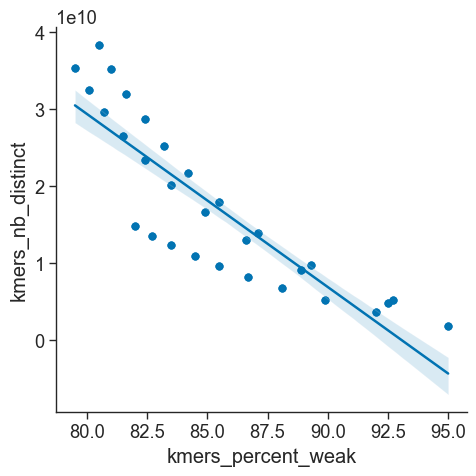

In [54]:
sns.lmplot(y="kmers_nb_distinct", x="kmers_percent_weak", data=df);